In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


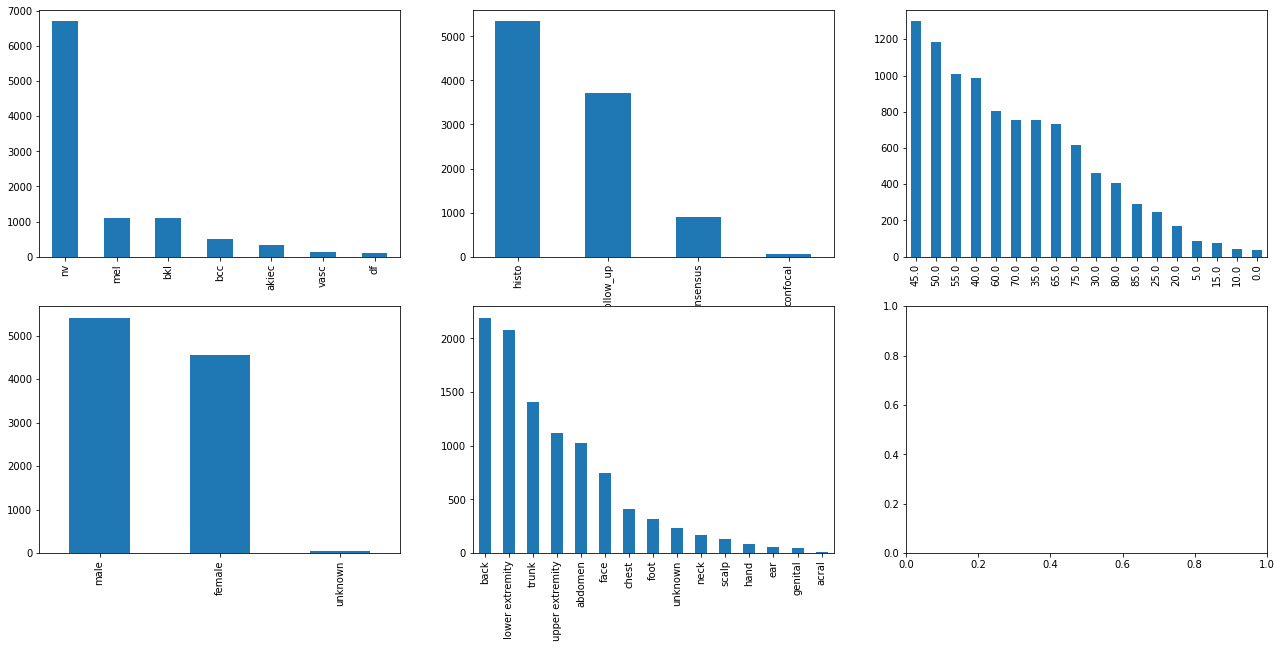

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22,10))

pd.value_counts(df['dx']).plot(ax=axes[0,0], kind='bar')
pd.value_counts(df['dx_type']).plot(ax=axes[0,1], kind='bar')
pd.value_counts(df['age']).plot(ax=axes[0,2], kind='bar')
pd.value_counts(df['sex']).plot(ax=axes[1,0], kind='bar')
pd.value_counts(df['localization']).plot(ax=axes[1,1], kind='bar')

In [ ]:
# Dont run this cell again.
s = df.groupby('dx').sex.count().reset_index()
s.to_csv('labels.csv')

In [4]:
import os
import os.path
import shutil

folder_path = "hamp2"
new_folder_path = "data"

images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

In [5]:
import re
imgs = list()
for img in images:
    result = re.sub('.jpg', '', img)
    imgs.append(result)


In [6]:
for image in imgs:
    folder_name = df.loc[df['image_id'] == image]['dx'].to_string().split()[1]

    new_path = os.path.join(new_folder_path, folder_name)
    if not os.path.exists(new_path):
        os.makedirs(new_path)

    old_image_path = os.path.join(folder_path, image + '.jpg').replace('\\','/')
    new_image_path = os.path.join(new_path, image + '.jpg').replace('\\','/')
    shutil.move(old_image_path, new_image_path)